In [133]:
## udf
import temporal_functions

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
from figurefirst import FigureLayout,mpl_functions

import statsmodels.api as sm
import statsmodels.formula.api as smf

import astropy
from astropy import stats
import math

import scipy
from scipy import stats

from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)


from scipy import optimize
from scipy import special

import figurefirst as fifi

In [24]:
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/'

In [26]:
t1=pd.read_hdf(folder_path+'dfs_for_temporalregression/10.20.20_temporal.hdf')
t2=pd.read_hdf(folder_path+'dfs_for_temporalregression/7.7.21_temporal.hdf')
t3=pd.read_hdf(folder_path+'dfs_for_temporalregression/9.26.21_temporal.hdf')
t4=pd.read_hdf(folder_path+'dfs_for_temporalregression/10.29.21_temporal.hdf')
t5=pd.read_hdf(folder_path+'dfs_for_temporalregression/10.30.21_temporal.hdf')
t6=pd.read_hdf(folder_path+'dfs_for_temporalregression/1.8.22_temporal.hdf')
t7=pd.read_hdf(folder_path+'dfs_for_temporalregression/1.11.22_temporal.hdf')
t8=pd.read_hdf(folder_path+'dfs_for_temporalregression/1.15.22_temporal.hdf')
t9=pd.read_hdf(folder_path+'dfs_for_temporalregression/4.30.22_temporal.hdf')
t10=pd.read_hdf(folder_path+'dfs_for_temporalregression/5.1.22_temporal.hdf')
t11=pd.read_hdf(folder_path+'dfs_for_temporalregression/5.2.22_temporal.hdf')
t12=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.1.22_temporal.hdf')
t13=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.3.22_temporal.hdf')
t14=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.7.22_temporal.hdf')
t15=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.8.22_temporal.hdf')
t16=pd.read_hdf(folder_path+'dfs_for_temporalregression/6.22.22_temporal.hdf')

In [65]:
alltemp=[t1,t2,t4,t7,t8,t12,t13,t14,t15,t16]

for i in range(len(alltemp)):
    alltemp[i]['turb_intensity']=alltemp[i]['speed_std']/alltemp[i]['speed_avg']
    
alltempconcat=pd.concat(alltemp)
alltempconcat=alltempconcat.reset_index(inplace=False)


In [106]:
t1['turb_intensity']=t1['speed_std']/t1['speed_avg']

In [138]:
desertchunks=pd.concat([t1,t7,t8,t12,t13])
forestchunks=pd.concat([t2,t4,t14,t15,t16])
urbanchunks=pd.concat([t3,t5,t6,t9,t10,t11])
desert=0,6,7,11,12
forest=1,3,13,14,15
urban=2,4,5,8,9,10

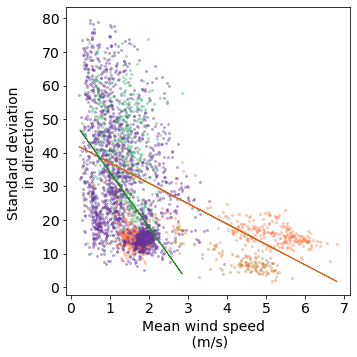

In [74]:
c=['peru', 'mediumseagreen', 'rebeccapurple', 'mediumseagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'rebeccapurple', 'rebeccapurple']

f, ax =plt.subplots(1,1, figsize=(5,5), layout='tight')

for i in range(0,len(alltemp)):
    ax.scatter(alltemp[i].speed_avg, np.abs(alltemp[i].direction_std),  s=4, color=c[i], alpha=.35, linewidth=None, rasterized=True)

slope, intercept = np.polyfit(desertchunks.speed_avg, desertchunks.direction_std, 1)
abline_values = [slope * i + intercept for i in desertchunks.speed_avg]
ax.plot(desertchunks.speed_avg, abline_values, 'chocolate', linewidth=1)
slope, intercept = np.polyfit(forestchunks.speed_avg, forestchunks.direction_std, 1)
abline_values = [slope * i + intercept for i in forestchunks.speed_avg]
ax.plot(forestchunks.speed_avg, abline_values, 'forestgreen', linewidth=1)  


ax.set_xlabel('Mean wind speed  \n (m/s)')
ax.set_ylabel('Standard deviation \n in direction')
fifi.mpl_functions.set_fontsize(f, 14)


In [139]:
desertchunks=desertchunks.reset_index(drop=True)
forestchunks=forestchunks.reset_index(drop=True)
urbanchunks=urbanchunks.reset_index(drop=True)

### Plotting the Contour Map using Seaborn KDE

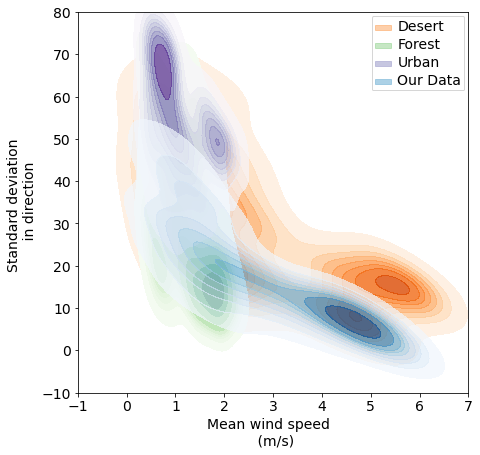

In [144]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.kdeplot(data=desertchunks, x='speed_avg', y='direction_std', cmap='Oranges', shade=True, ax=ax, alpha=0.8, thresh=0.05, label='Desert')
sns.kdeplot(data=forestchunks, x='speed_avg', y='direction_std', cmap='Greens', shade=True, ax=ax, alpha=1, label='Forest')
sns.kdeplot(data=urbanchunks, x='speed_avg', y='direction_std', cmap='Purples', shade=True, ax=ax, alpha=0.7, thresh=0.05, label='Urban')  # Assuming 't1' is another dataset
sns.kdeplot(data=t1, x='speed_avg', y='direction_std', cmap='Blues', shade=True, ax=ax, alpha=0.7, thresh=0.05, label='Our Data')  # Assuming 't1' is another dataset
ax.set_xlim(-1,7)
ax.set_ylim(-10,80)
ax.set_xlabel('Mean wind speed  \n (m/s)')
ax.set_ylabel('Standard deviation \n in direction')

# mpl_functions.adjust_spines(ax,['left','bottom'],
#                             spine_locations={'left': 1,'bottom': 1}, 
#                             smart_bounds=True,   
#                             xticks=[0,7],
#                             yticks=[0,80],
#                             linewidth=0.5)


# Custom legend patches
desert_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='Desert', alpha=0.5)
forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest', alpha=0.5)
urban_patch = mpatches.Patch(color=sns.color_palette("Purples")[2], label='Urban', alpha=0.7)
t1_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='Our Data', alpha=0.7)

# Add patches to the legend
ax.legend(handles=[desert_patch, forest_patch, urban_patch,t1_patch])


mpl_functions.set_fontsize(f, 14)
f.savefig('../../Figure/LagAll.jpeg', dpi=300, bbox_inches = "tight")